<a href="https://colab.research.google.com/github/KOZlegend/Dark-Matter/blob/main/galaxyrotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # import numpy
import astropy.units as u # import astropy units
import astropy.constants as ac # import astropy constants
import matplotlib.pyplot as plt # import plotting

In [ ]:
from google.colab import files # import files from colab

In [ ]:
upload = files.upload() # upload data

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii # import ascii

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") # have program read the data and put it in a table

(0.0, 300.0)

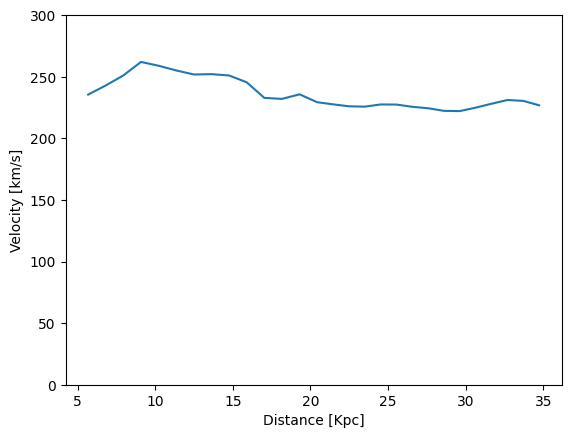

In [ ]:
dis = tab["col2"] # name the second column as distance
vel = tab["col3"] # name the third column as velocity
plt.plot(dis,vel) # plot the distance and velocity
plt.xlabel("Distance [Kpc]") # labels the x-axis of the plot
plt.ylabel("Velocity [km/s]") # labels the y-axis of the plot
plt.ylim(0,300) # changes the scale of the y-axis to 0 to 300

In [ ]:
def calculate_orbital_velocity(mass, radius): # define inputs of calculation
  return(np.sqrt(ac.G * mass / radius)) # define calculation and output

In [ ]:
mass = 1 * u.earthMass # set mass as mass of Earth
radius = 1* u.earthRad # set radius as radius of Earth
orb_vel = calculate_orbital_velocity(mass, radius) # calculate orbital velocity based on mass and radius using equation
print(orb_vel.to(u.km / u.s)) # print calculation in km/s

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass # set mass as mass of M31 SMBH
radius = 5.68 * 1000 * u.parsec # set radius as 5.68 kiloparsecs
orb_vel = calculate_orbital_velocity(mass, radius) # calculate orbital velocity based on mass of M31 SMBH within radius of 5.68 kiloparsecs
print(orb_vel.to(u.km / u.s)) # print calculation in km/s

4.766142291386287 km / s


In [ ]:
vel_blackhole = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis): # create for loop to execute calculation on every line of data
  rad = radius * 1000 * u.parsec # converts data from unitless number to unit and renames it rad
  orb_vel = calculate_orbital_velocity(mass, rad) # calculate orbital velocity based on mass and radius
  vel_blackhole[i] = orb_vel # gives velocity from black hole at given index value
  # print("The orbital velocity at ", radius, " kpc = " , orb_vel.to(u.km / u.s))

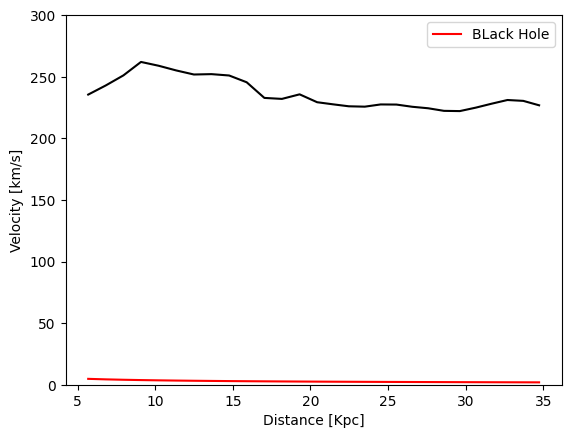

In [ ]:
dis = tab["col2"] # name the second column as distance
vel = tab["col3"] # name the third column as velocity
plt.plot(dis,vel, color="black") # set orbital velocity trend to color black
plt.plot(dis, vel_blackhole.value, color="red", label="Black Hole") # set orbital velocity from black hole trend to color red
plt.xlabel("Distance [Kpc]") # labels the x-axis of plot
plt.ylabel("Velocity [km/s]") # labels the y-axis of the plot
plt.ylim(0,300) # changes the scale of the y-axis to 0 to 300
plt.legend() # adds legend for colors